In [2]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import sys
sys.path.append('/Users/Simon/GIT/gplates-web/django/GWS/reconstructions/')
from get_model import get_model_name_list,get_model_dictionary

%matplotlib inline


proxies = {'http':''}

#r = requests.get('http://paleobiodb.org/data1.1/occs/list.json?limit=all&interval_id=3001&show=coords,attr,loc,prot,time,strat,stratext,lith,lithext,geo,rem,ent,entname,crmod&showsource',
#                 proxies=proxies)
#
#print r.status_code
#print r.headers['content-type']
#print r.encoding
#
#pbdb = json.loads(r.text)
#
#lons = []
#lats = []
#for record in pbdb['records']:
#    lons.append(record['lng'])
#    lats.append(record['lat'])
   

MODEL_STORE = '/Users/Simon/GIT/gplates-web/MODELS/'

print get_model_name_list(MODEL_STORE)


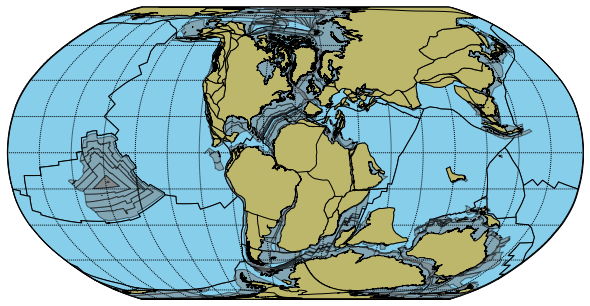

In [3]:
recon_time = 130

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/reconstructions/coastlines/?time=%0.2f' % recon_time,
                 proxies=proxies)
cs = json.loads(r.text)

# Send Request for (topological) plate polygons
r = requests.get('http://127.0.0.1:8000/reconstructions/plate_polygons/?time=%0.2f' % recon_time,
                 proxies=proxies)
pp = json.loads(r.text)

# Send Request for static polygons
r = requests.get('http://127.0.0.1:8000/reconstructions/static_polygons/?time=%0.2f' % recon_time,
                 proxies=proxies)
sp = json.loads(r.text)


fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='robin',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))
for feature in cs['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='darkkhaki', edgecolor='k', linewidths=1., zorder=3))
for feature in sp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='gray', edgecolor='k', alpha=0.5, linewidths=1., zorder=2))
for feature in pp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='skyblue', edgecolor='k', linewidths=1., zorder=1))  

plt.show()




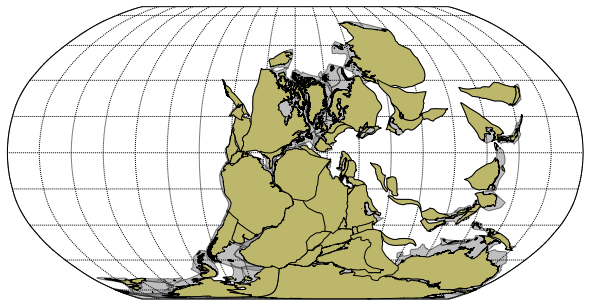

In [4]:
recon_time = 270

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/reconstructions/coastlines/?time=%0.2f&model=GOLONKA' % recon_time,
                 proxies=proxies)
cs = json.loads(r.text)

# Send Request for static polygons
r = requests.get('http://127.0.0.1:8000/reconstructions/static_polygons/?time=%0.2f&model=GOLONKA' % recon_time,
                 proxies=proxies)
sp = json.loads(r.text)


fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='robin',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))
for feature in cs['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='darkkhaki', edgecolor='k', linewidths=1., zorder=3))
for feature in sp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='gray', edgecolor='k', alpha=0.5, linewidths=1., zorder=2))

plt.show()





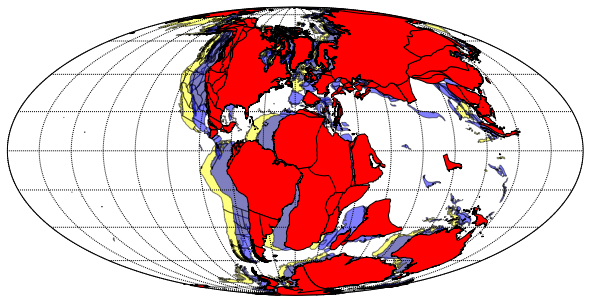

In [5]:
recon_time = 120

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/reconstructions/coastlines/?time=%0.2f&model=SETON2012' % recon_time,
                 proxies=proxies)
cs1 = json.loads(r.text)

# Send Request for static polygons
r = requests.get('http://127.0.0.1:8000/reconstructions/coastlines/?time=%0.2f&model=VH_VDM' % recon_time,
                 proxies=proxies)
cs2 = json.loads(r.text)

# Send Request for static polygons
r = requests.get('http://127.0.0.1:8000/reconstructions/coastlines/?time=%0.2f&model=MULLER2016' % recon_time,
                 proxies=proxies)
cs3 = json.loads(r.text)


fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='moll',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))
for feature in cs1['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='red', edgecolor='k', linewidths=1., zorder=3))
for feature in cs2['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='yellow', edgecolor='k', alpha=0.5, linewidths=1., zorder=2))
for feature in cs3['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='blue', edgecolor='k', alpha=0.5, linewidths=1., zorder=2))

plt.show()





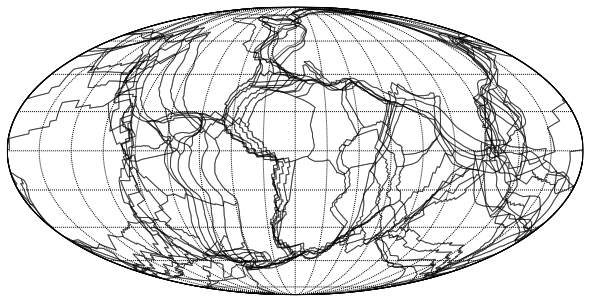

In [20]:
fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='moll',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))

for recon_time in np.arange(0,101,20):

    # Send Request for coastlines
    r = requests.get('http://127.0.0.1:8000/reconstructions/plate_polygons/?time=%0.2f&model=SETON2012' % recon_time,
                     proxies=proxies)
    cs = json.loads(r.text)

    for feature in cs['features']:
        coords = feature['geometry']['coordinates']
        xy = zip(*coords[0])
        x,y = m(xy[0],xy[1])
        patch = []
        patch.append( Polygon(zip(x,y), True) )
        ax_map.add_collection(PatchCollection(patch, facecolor='', edgecolor='k', linewidths=1., zorder=3, alpha=0.5))

plt.show()




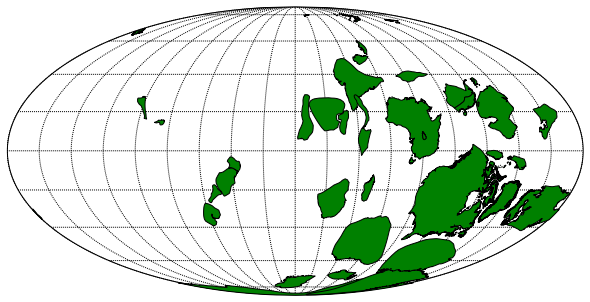

In [17]:
recon_time = 780

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/reconstructions/static_polygons/?time=%0.2f&model=RODINIA2013' % recon_time,
                 proxies=proxies)
sp = json.loads(r.text)


fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
#m = Basemap(resolution='c',projection='ortho',lat_0=-20,lon_0=80.,ax=ax_map)
m = Basemap(resolution='c',projection='moll',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))
for feature in sp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='g', edgecolor='k', linewidths=1., zorder=3))

plt.show()



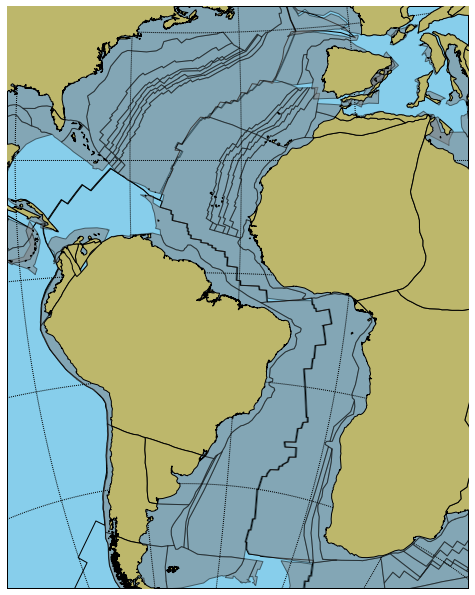

In [27]:
## Try double splitting geometries for ortho projection

recon_time = 83

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/reconstructions/coastlines/?time=%0.2f' % recon_time,
                 proxies=proxies)
cs = json.loads(r.text)

# Send Request for (topological) plate polygons
r = requests.get('http://127.0.0.1:8000/reconstructions/plate_polygons/?time=%0.2f' % recon_time,
                 proxies=proxies)
pp = json.loads(r.text)

# Send Request for static polygons
r = requests.get('http://127.0.0.1:8000/reconstructions/static_polygons/?time=%0.2f' % recon_time,
                 proxies=proxies)
sp = json.loads(r.text)


fig = plt.figure(figsize=(8,10))
ax_map = fig.add_axes([0,0,0.8,1.0])
#m = Basemap(resolution='c',projection='robin',lon_0=0.,ax=ax_map)
m = Basemap(projection='stere',lon_0=-30,lat_0=-20.,lat_ts=-40,\
            llcrnrlat=-50,urcrnrlat=40,\
            llcrnrlon=-80,urcrnrlon=20,\
            rsphere=6371200.,resolution='l',area_thresh=10000,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))
for feature in cs['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='darkkhaki', edgecolor='k', linewidths=1., zorder=3))
for feature in sp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='gray', edgecolor='k', alpha=0.5, linewidths=1., zorder=2))
for feature in pp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='skyblue', edgecolor='k', linewidths=1., zorder=1))  

plt.show()



